In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('Processed_data/claims.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324203 entries, 0 to 324202
Data columns (total 13 columns):
claim_id           323149 non-null float64
enrollee_id        324194 non-null float64
provider_id        324194 non-null float64
provider_status    324194 non-null float64
hmo_id             324194 non-null float64
care_id            323149 non-null float64
qty                323149 non-null float64
amount             323149 non-null float64
approved_qty       323149 non-null float64
approved_amount    323149 non-null float64
hmo_approved       323149 non-null float64
created_at         324194 non-null object
vetted_at          282385 non-null object
dtypes: float64(11), object(2)
memory usage: 34.6+ MB


# Further Data serenity check and Cleaning 

In [4]:
# drop cases without claim_id
df.dropna(subset=['claim_id'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323149 entries, 0 to 323148
Data columns (total 13 columns):
claim_id           323149 non-null float64
enrollee_id        323140 non-null float64
provider_id        323140 non-null float64
provider_status    323140 non-null float64
hmo_id             323140 non-null float64
care_id            323149 non-null float64
qty                323149 non-null float64
amount             323149 non-null float64
approved_qty       323149 non-null float64
approved_amount    323149 non-null float64
hmo_approved       323149 non-null float64
created_at         323140 non-null object
vetted_at          282380 non-null object
dtypes: float64(11), object(2)
memory usage: 34.5+ MB


In [19]:
# check data with enrollee_id is null
df.loc[df['enrollee_id'].isnull()]

,claim_id,enrollee_id,provider_id,provider_status,hmo_id,care_id,qty,amount,approved_qty,approved_amount,hmo_approved,created_at,vetted_at
143897,27849,NaN,NaN,NaN,NaN,2680.0,1.0,350.0,1.0,350.0,1.0,NaN,NaN
143898,27849,NaN,NaN,NaN,NaN,11.0,1.0,2000.0,1.0,2000.0,1.0,NaN,NaN
143899,27849,NaN,NaN,NaN,NaN,44896.0,1.0,7500.0,1.0,7500.0,1.0,NaN,NaN
143900,27849,NaN,NaN,NaN,NaN,45535.0,1.0,4000.0,1.0,4000.0,1.0,NaN,NaN
143901,27849,NaN,NaN,NaN,NaN,9458.0,1.0,375.0,1.0,375.0,1.0,NaN,NaN
143902,27849,NaN,NaN,NaN,NaN,11845.0,6.0,1500.0,6.0,1500.0,1.0,NaN,NaN
143903,27849,NaN,NaN,NaN,NaN,11716.0,30.0,1500.0,30.0,1500.0,1.0,NaN,NaN
143904,27849,NaN,NaN,NaN,NaN,11489.0,30.0,4500.0,30.0,4500.0,1.0,NaN,NaN
143905,27849,NaN,NaN,NaN,NaN,61797.0,18.0,181.8,18.0,181.8,1.0,NaN,NaN


In [20]:
df.loc[df['claim_id']==27849]

,claim_id,enrollee_id,provider_id,provider_status,hmo_id,care_id,qty,amount,approved_qty,approved_amount,hmo_approved,created_at,vetted_at
143897,27849,NaN,NaN,NaN,NaN,2680.0,1.0,350.0,1.0,350.0,1.0,NaN,NaN
143898,27849,NaN,NaN,NaN,NaN,11.0,1.0,2000.0,1.0,2000.0,1.0,NaN,NaN
143899,27849,NaN,NaN,NaN,NaN,44896.0,1.0,7500.0,1.0,7500.0,1.0,NaN,NaN
143900,27849,NaN,NaN,NaN,NaN,45535.0,1.0,4000.0,1.0,4000.0,1.0,NaN,NaN
143901,27849,NaN,NaN,NaN,NaN,9458.0,1.0,375.0,1.0,375.0,1.0,NaN,NaN
143902,27849,NaN,NaN,NaN,NaN,11845.0,6.0,1500.0,6.0,1500.0,1.0,NaN,NaN
143903,27849,NaN,NaN,NaN,NaN,11716.0,30.0,1500.0,30.0,1500.0,1.0,NaN,NaN
143904,27849,NaN,NaN,NaN,NaN,11489.0,30.0,4500.0,30.0,4500.0,1.0,NaN,NaN
143905,27849,NaN,NaN,NaN,NaN,61797.0,18.0,181.8,18.0,181.8,1.0,NaN,NaN


In [5]:
# drop cases without enrollee id
df.dropna(subset=['enrollee_id'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323140 entries, 0 to 323148
Data columns (total 13 columns):
claim_id           323140 non-null float64
enrollee_id        323140 non-null float64
provider_id        323140 non-null float64
provider_status    323140 non-null float64
hmo_id             323140 non-null float64
care_id            323140 non-null float64
qty                323140 non-null float64
amount             323140 non-null float64
approved_qty       323140 non-null float64
approved_amount    323140 non-null float64
hmo_approved       323140 non-null float64
created_at         323140 non-null object
vetted_at          282380 non-null object
dtypes: float64(11), object(2)
memory usage: 34.5+ MB


In [6]:
# total claims
len(df.claim_id.unique())

61397

In [7]:
# total cares
len(df.care_id.unique())

14171

In [8]:
# total providers
len(df.provider_id.unique())

221

In [9]:
# total hmo_ids
len(df.hmo_id.unique())

5

In [10]:
df.columns

Index(['claim_id', 'enrollee_id', 'provider_id', 'provider_status', 'hmo_id',
       'care_id', 'qty', 'amount', 'approved_qty', 'approved_amount',
       'hmo_approved', 'created_at', 'vetted_at'],
      dtype='object')

In [11]:
# change column data type
for col in ['claim_id', 'enrollee_id', 'provider_id', 'provider_status', 'hmo_id',
       'care_id', 'qty', 'approved_qty', 'hmo_approved']:
    df[col] = df[col].astype('int')
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323140 entries, 0 to 323148
Data columns (total 13 columns):
claim_id           323140 non-null category
enrollee_id        323140 non-null category
provider_id        323140 non-null category
provider_status    323140 non-null category
hmo_id             323140 non-null category
care_id            323140 non-null category
qty                323140 non-null category
amount             323140 non-null float64
approved_qty       323140 non-null category
approved_amount    323140 non-null float64
hmo_approved       323140 non-null category
created_at         323140 non-null object
vetted_at          282380 non-null object
dtypes: category(9), float64(2), object(2)
memory usage: 22.0+ MB


In [13]:
# check data history range
df['created_at'] = pd.to_datetime(df['created_at'])
df['vetted_at'] = pd.to_datetime(df['vetted_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323140 entries, 0 to 323148
Data columns (total 13 columns):
claim_id           323140 non-null category
enrollee_id        323140 non-null category
provider_id        323140 non-null category
provider_status    323140 non-null category
hmo_id             323140 non-null category
care_id            323140 non-null category
qty                323140 non-null category
amount             323140 non-null float64
approved_qty       323140 non-null category
approved_amount    323140 non-null float64
hmo_approved       323140 non-null category
created_at         323140 non-null datetime64[ns]
vetted_at          282380 non-null datetime64[ns]
dtypes: category(9), datetime64[ns](2), float64(2)
memory usage: 22.0 MB


In [14]:
df['vetting_time'] = df['vetted_at'] - df['created_at']
df['vetting_time'].mean(),df['vetting_time'].std()

(Timedelta('40 days 17:22:32.002330'), Timedelta('28 days 23:59:07.677288'))

In [19]:
# check the 'cares' table
cares = pd.read_csv('Data/cares.csv',index_col=0)
care_type = pd.read_csv('Data/care_types.csv',index_col=0)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
cares.head()

,id,name,base_name,type,active,created_at,updated_at,nlp_result,type_id,meta,drug_generic_id,parent_id,cve_version
0,2,Chest X-ray,NaN,INVESTIGATION,1,2019-04-23 15:27:50,2019-09-26 18:40:31,NaN,NaN,NaN,NaN,NaN,NaN
1,6,Gentamycin,NaN,DRUG,1,2019-04-23 15:27:50,2019-10-05 18:14:30,NaN,1.0,NaN,927.0,NaN,NaN
2,7,Amikacin,NaN,DRUG,1,2019-04-23 15:27:50,2019-10-06 01:58:26,NaN,1.0,NaN,178.0,NaN,NaN
3,8,Metronidazole 500mg,NaN,DRUG,1,2019-04-23 15:27:50,2019-04-23 15:27:50,NaN,NaN,NaN,NaN,NaN,NaN
4,9,Consultation,NaN,NaN,1,2019-04-23 15:27:50,2019-04-23 15:27:50,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
cares.type.isnull().sum(),cares.shape,len(cares.type.unique()),len(cares.name.unique())

(44094, (83124, 13), 3010, 83077)

In [113]:
# explore care types
care_type_id = {}
i = 0
for care_type, type_id in zip(cares['type'],cares['type_id']):
    if care_type in care_type_id:
        continue
    else:
        if type_id == None:
            continue
        else:
            care_type_id[care_type] = type_id
            
            

In [37]:
"""
check gramma
a = np.array(['DRUG','DRUG','DRUG'])
b = Counter(a)
b.most_common()[0][0]

"""


'DRUG'

In [114]:
care_type_id

{'INVESTIGATION': nan,
 'DRUG': 1.0,
 nan: nan,
 'PROCEDURE': nan,
 'ADMISSION_PROF_FEE': nan,
 'INVESTIGAGTIONS': nan,
 'PRIVATE WARD': nan,
 'Minor': nan,
 'MINOR': nan,
 'REFER REDCARE': nan,
 'Rh +ve': nan,
 "Lord's procedure": nan,
 'BEDSPACE': nan,
 'DRUGS': nan,
 'Procedure': nan,
 'Drugs': nan,
 'Investigation': nan,
 'TYPE': 1.0,
 '3150': nan,
 '175': nan,
 '10300': nan,
 '2300': nan,
 '240': nan,
 '2070': nan,
 '9940': nan,
 '370': nan,
 '4765': nan,
 '85': nan,
 '555': nan,
 '4235': nan,
 '60': nan,
 '305': nan,
 '5065': nan,
 '210': nan,
 '230': nan,
 '100': nan,
 '195': nan,
 '1610': nan,
 '690': nan,
 '25': nan,
 '115': nan,
 '115.58399999999999': nan,
 '180': nan,
 '2520': nan,
 '1520': nan,
 '3025': nan,
 '485': nan,
 '40': nan,
 '685': nan,
 '250': nan,
 '1530': nan,
 '1660': nan,
 '4935': nan,
 '1535': nan,
 '385': nan,
 '530': nan,
 '345': nan,
 '810': nan,
 '145': nan,
 '2600': nan,
 '1955': nan,
 '50570': nan,
 '3520': nan,
 '350': nan,
 '155': nan,
 '1060': nan,
 

## Check other tables

In [2]:
# check table 'claim'
claim = pd.read_csv('Data/claims.csv',index_col=0)
claim.head()

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,hmo_id,hmo_pile_id,provider_id,enrollee_id,enrollee_info,admission_start,admission_end,approval_code,encounter_date,...,provider_approved_by,hmo_status,created_at,updated_at,hmo_skipped,log,synced_at,vetted_at,child_hmo_id,meta
0,10,1,1.0,1,89,NaN,NaN,NaN,NaN,2018-03-02,...,0.0,1,2018-03-12 14:53:46,2018-05-21 10:05:30,0,NaN,2018-11-27 12:11:53,2018-05-21 10:05:30,NaN,NaN
1,11,1,1.0,1,89,NaN,NaN,NaN,NaN,2018-03-02,...,5.0,1,2018-03-13 14:50:39,2018-05-21 10:07:19,0,NaN,2018-11-27 12:11:53,2018-05-21 10:07:19,NaN,NaN
2,13,1,1.0,1,74,NaN,NaN,NaN,NaN,2018-03-10,...,0.0,1,2018-03-16 10:28:53,2018-05-21 10:09:30,0,NaN,2018-11-27 12:11:53,2018-05-21 10:09:30,NaN,NaN
3,14,1,1.0,1,89,NaN,NaN,NaN,NaN,2018-03-02,...,0.0,1,2018-03-16 10:34:41,2018-05-21 10:09:56,0,NaN,2018-11-27 12:11:53,2018-05-21 10:09:56,NaN,NaN
4,15,1,1.0,1,183,NaN,NaN,NaN,RC/03/2PRO01AM,2018-03-11,...,0.0,1,2018-03-16 10:49:57,2018-05-21 10:15:05,0,NaN,2018-11-27 12:11:53,2018-05-21 10:15:05,NaN,NaN


In [3]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62451 entries, 0 to 62450
Data columns (total 24 columns):
id                      62451 non-null int64
hmo_id                  62451 non-null int64
hmo_pile_id             62167 non-null float64
provider_id             62451 non-null int64
enrollee_id             62451 non-null int64
enrollee_info           0 non-null float64
admission_start         1903 non-null object
admission_end           1903 non-null object
approval_code           38311 non-null object
encounter_date          62451 non-null object
total_amount            62451 non-null float64
approved_amount         62451 non-null float64
created_by              62451 non-null int64
provider_status         62451 non-null int64
provider_approved_by    11667 non-null float64
hmo_status              62451 non-null int64
created_at              62451 non-null object
updated_at              62451 non-null object
hmo_skipped             62451 non-null int64
log                     47

In [5]:
# check table 'claim_items'
claim_items = pd.read_csv('Data/claim_items.csv',index_col=0)
claim_items.head()

,id,claim_id,care_id,amount,created_at,hmo_approved,updated_at,qty,approved_amount,approved_qty,comment_id,drug_frequency,drug_duration,drug_duration_sub,tariff_id
0,16,10,586,1816.08,2018-03-12 14:53:46,1,2018-05-21 10:05:30,6,1816.08,6,NaN,NaN,NaN,NaN,NaN
1,17,11,586,1816.08,2018-03-13 14:50:39,1,2018-05-21 10:07:19,6,1816.08,6,NaN,NaN,NaN,NaN,NaN
2,56,13,434,115.00,2018-03-16 10:28:53,1,2018-05-21 10:09:30,5,115.00,5,NaN,NaN,NaN,NaN,NaN
3,57,13,1102,1265.00,2018-03-16 10:28:53,1,2018-05-21 10:09:30,10,1265.00,10,NaN,NaN,NaN,NaN,NaN
4,58,13,299,138.00,2018-03-16 10:28:53,1,2018-05-21 10:09:30,15,138.00,15,NaN,NaN,NaN,NaN,NaN


In [6]:
# check table 'diagnosis'
diag = pd.read_csv('Data/diagnoses.csv',index_col = 0)
diag

,id,icd_order,icd_code,icd_header,name,category_id,active,matching_enabled,nlp_meta
0,1,NaN,NaN,NaN,CHOLERA,1.0,1,NaN,NaN
1,2,NaN,NaN,NaN,TYPHOID/ ENTERIC FEVER,1.0,1,1.0,NaN
2,3,NaN,NaN,NaN,TUBERCULOSIS,1.0,1,NaN,NaN
3,4,NaN,NaN,NaN,STIs,1.0,1,NaN,NaN
4,5,NaN,NaN,NaN,UTIs,1.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
104267,104324,NaN,NaN,NaN,Otherspecifieddegenerativediseasesofnervoussystem,NaN,1,NaN,NaN
104268,104325,NaN,NaN,NaN,Otherspondylosiswithradiculopathy,NaN,1,NaN,NaN
104269,104326,NaN,NaN,NaN,cervicalregion,NaN,1,NaN,NaN
104270,104327,NaN,NaN,NaN,Postkneereplacementsurgery,NaN,1,NaN,NaN


In [7]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104272 entries, 0 to 104271
Data columns (total 9 columns):
id                  104272 non-null int64
icd_order           94743 non-null float64
icd_code            94782 non-null object
icd_header          94743 non-null float64
name                104271 non-null object
category_id         8192 non-null float64
active              104272 non-null int64
matching_enabled    29 non-null float64
nlp_meta            0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 8.0+ MB


In [12]:
diag.icd_code.unique()

array([nan, 'A00', 'A000', ..., 'B24', 'X33', 'Y575'], dtype=object)

In [14]:
# check integrated table
df = pd.read_csv('Processed_data/all_data.csv',index_col=0)
df.head()

,claim_id,enrollee_id,provider_id,hmo_id,care_id,diagnosis_id,qty,amount,unit_price,tariffs,created_at,vetted_at,label
0,10.0,89.0,1.0,1.0,586.0,9.0,6.0,1816.08,302.68,302.68,2018-03-12 14:53:46,2018-05-21 10:05:30,0
1,11.0,89.0,1.0,1.0,586.0,15925.0,6.0,1816.08,302.68,302.68,2018-03-13 14:50:39,2018-05-21 10:07:19,0
2,13.0,74.0,1.0,1.0,434.0,4342.0,5.0,115.00,23.00,23.00,2018-03-16 10:28:53,2018-05-21 10:09:30,0
3,13.0,74.0,1.0,1.0,1102.0,4342.0,10.0,1265.00,126.50,126.50,2018-03-16 10:28:53,2018-05-21 10:09:30,0
4,13.0,74.0,1.0,1.0,299.0,4342.0,15.0,138.00,9.20,9.20,2018-03-16 10:28:53,2018-05-21 10:09:30,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744870 entries, 0 to 744869
Data columns (total 13 columns):
claim_id        744870 non-null float64
enrollee_id     744870 non-null float64
provider_id     744870 non-null float64
hmo_id          744870 non-null float64
care_id         744870 non-null float64
diagnosis_id    744861 non-null float64
qty             744870 non-null float64
amount          744870 non-null float64
unit_price      744870 non-null float64
tariffs         668049 non-null float64
created_at      744870 non-null object
vetted_at       744870 non-null object
label           744870 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 79.6+ MB


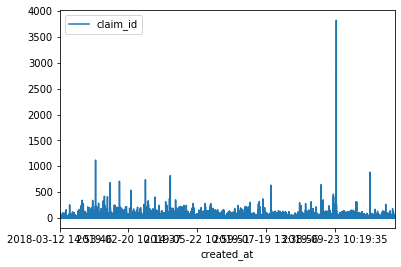

In [17]:
# check claim histogram for legal claims
df[['claim_id','created_at']].loc[df.label==0].groupby('created_at').count().plot()

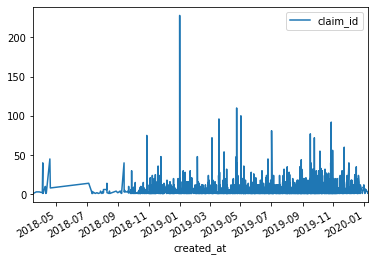

In [24]:
# check claim histogram for false claims
df[['claim_id','created_at']].loc[df.label==1].groupby('created_at').count().plot()

In [18]:
# define claim creation date as datetime object and set it as index to facilitate time series explore
df['created_at'] = pd.to_datetime(df['created_at'])

In [25]:

df = df.set_index('created_at')

Text(0, 0.5, 'claim counts')

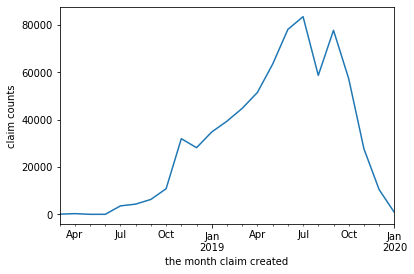

In [31]:
# resample time to '1month' frequency to see the trend for legal claims numbers
df.loc[df.label==0].resample('1m').claim_id.count().plot()
plt.xlabel('the month claim created')
plt.ylabel('claim counts')

Text(0, 0.5, 'claim counts')

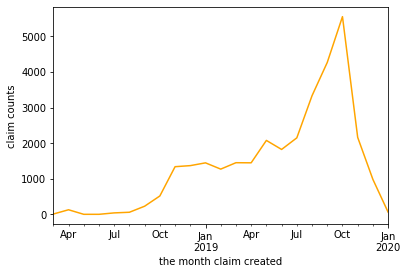

In [33]:
# resample time to '1month' frequency to see the trend for false claims numbers
df.loc[df.label==1].resample('1m').claim_id.count().plot(color = 'orange')
plt.xlabel('the month claim created')
plt.ylabel('claim counts')

Text(0, 0.5, 'average claim amount')

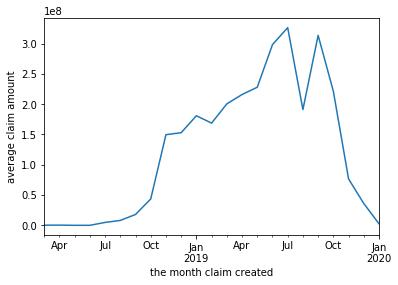

In [36]:
# resample time to '1month' frequency to see the trend for legal claims total cost
df.loc[df.label==0].resample('1m').amount.sum().plot()
plt.xlabel('the month claim created')
plt.ylabel('average claim amount')

Text(0, 0.5, 'average claim amount')

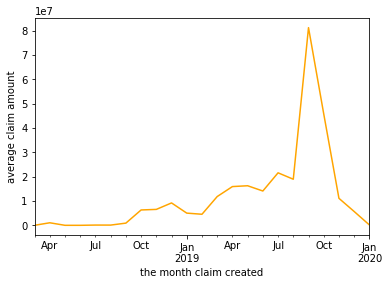

In [37]:
# resample time to '1month' frequency to see the trend for false claims total cost
df.loc[df.label==1].resample('1m').amount.sum().plot(color='orange')
plt.xlabel('the month claim created')
plt.ylabel('average claim amount')

## Display table size for all tables

In [46]:
from glob2 import glob
import pathlib

In [52]:
# get all table files
path = pathlib.Path().absolute()
path

PosixPath('/Users/shunling/Desktop/Insight_HealthDataScience/Projects/P3')

In [58]:
files = glob('Data/*.csv')
files

['Data/claim_comments.csv',
 'Data/provider_tariffs.csv',
 'Data/claims.csv',
 'Data/cares.csv',
 'Data/claim_diagnoses.csv',
 'Data/care_types.csv',
 'Data/comments.csv',
 'Data/claim_items.csv',
 'Data/diagnoses.csv']

In [59]:
# read all tables
df = {}
for f in files:
    name = f[5:-5]
    df[name] = pd.read_csv(f,index_col=0)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
# check size for each table
for f in df:
    print(f,":", df[f].shape[0]," rows x ",df[f].shape[1], "columns")

claim_comment : 402  rows x  6 columns
provider_tariff : 335181  rows x  11 columns
claim : 62451  rows x  24 columns
care : 83124  rows x  13 columns
claim_diagnose : 112119  rows x  3 columns
care_type : 15  rows x  4 columns
comment : 3117  rows x  2 columns
claim_item : 323149  rows x  15 columns
diagnose : 104272  rows x  9 columns
